In [1]:
# find out this aspects :
#i)top customers with most order placed
#ii)top customers with greatest spending
#iii)top countries the greatest spending


In [58]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
import math as mt 
import matplotlib.pyplot as plt


In [68]:
data = pd.read_csv('clean data.csv').drop_duplicates('invoice_no')


<Axes: xlabel='customer_id'>

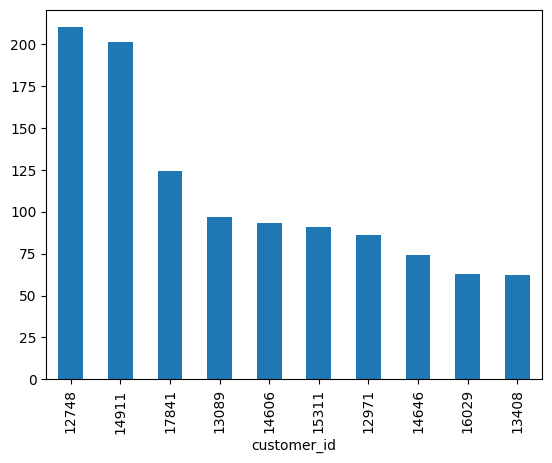

In [74]:
#i)top customers with most order placed
data1=data.groupby('customer_id')['invoice_no'].count().sort_values(ascending=False).head(10).plot(kind='bar')
data1

<Axes: xlabel='customer_id'>

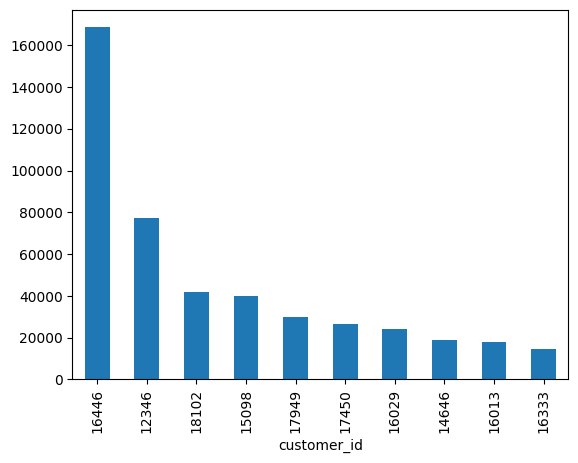

In [76]:
#ii)top customers with greatest spending
data2=data.groupby('customer_id')['amount_spent'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
data2

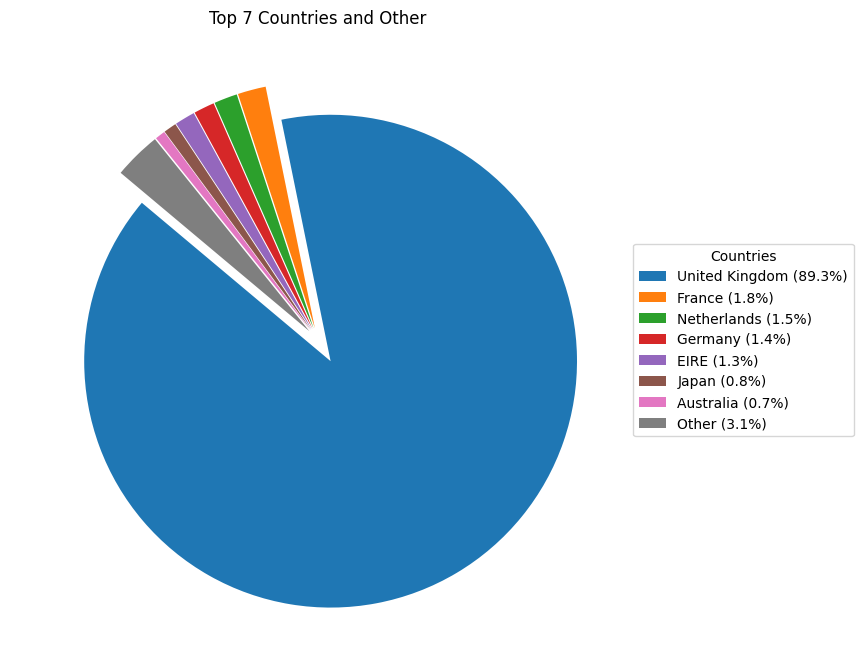

In [92]:
#iii)top countries the greatest spending
explode = (0.1, 0.05,0.05,0.05,0.05,0.05,0.05,0.05)
# Sort the customers by spending in descending order
data3 = data.groupby('country')['amount_spent'].sum().sort_values(ascending=False)

# Select the top 7 customers and combine the rest into an "Other" category
top_7 = data3.head(7)
other = data3[7:]
other_total = other.sum()

# Create a new DataFrame with the top 7 customers and the "Other" category
top_countries = pd.concat([top_7, pd.Series({'Other': other_total})])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries,explode=explode, labels=[''] * len(top_countries), autopct='', startangle=140, textprops={'fontsize': 12},)
legend_labels = [f"{country} ({percentage:.1f}%)" for country, percentage in zip(top_countries.index, top_countries / top_countries.sum() * 100)]
plt.legend(legend_labels, title="Countries", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Top 7 Countries and Other')

plt.show()

